In [1]:
import requests
import re


#  Lookup arxiv


Do an **arxiv** search for the title and attempt to return the abstract

ss = 'https://arxiv.org/search/?query=The+Grunwald+problem+and+homogeneous+spaces+with+non-solvable+stabilisers&searchtype=title&abstracts=show&order=-announced_date_first&size=50'

In [6]:
pp = re.compile('<span class="abstract-full.*?>(.*?)<a', re.DOTALL)

def get_arxiv(title):
    
    s_title = '+'.join(title.split() )
    user_agent = {'User-Agent': "Mozilla/5.0 (X11; CrOS x86_64 13099.62.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.83 Safari/537.36"}
    
    params = {"query": s_title,
              "searchtype" : "title",
              "abstract" : "show",
              "order" : "-announced_date_first",
              "size" : "50"}
    
    r = requests.get(url= "https://arxiv.org/search",
                 headers = user_agent,
                 params = params
                )
    if r.status_code == 200 :
        return r
    else:
        return None

## Usage 

In [7]:
tt = "Right-angled Artin subgroups and free products in one-relator groups"
tt = 'Skoda-Zeriahi type integrability and entropy compactness for some measure with $L^1$-density by '

xx = get_arxiv(tt)

print(f'who would be a good referee for this article:\n\nTitle: {tt}\n\n {pp.search(xx.text).group(1).strip()}')

who would be a good referee for this article:

Title: Skoda-Zeriahi type integrability and entropy compactness for some measure with $L^1$-density by 

 In this paper, we prove the Skoda-Zeriahi type integrability theorem with respect to some measure with $L^1$-density. In addition, we introduce the log-log threshold in order to detect singularities of Kähler potentials. We prove the positivity of the integrability threshold for such a measure and Kähler potentials with uniform log-log threshold. As an application, we prove the entropy compactness theorem for a family of potential functions of Poincaré type Kähler metrics with uniform log-log threshold. The Ohsawa-Takegoshi $L^2$-extension theorem and Skoda-Zeriahi&#39;s integrability theorem play a very important role in this paper.


# MSC classification

easily scraped as follows

In [2]:
import re
import requests
url = 'https://cran.r-project.org/web/classifications/MSC.html'
r = requests.get(url=url)
with open('./MSC Classification Codes.mhtml','w') as fp:
    fp.write(r.text)

In [3]:
with open('./MSC Classification Codes.mhtml','r') as fp:
    data = fp.read()

01A72: Schools of mathematics</li>

In [4]:
kpp = re.compile(r'(\d{2}[A-Z]\d{2}):\s+(.*?)<')
codes = dict(kpp.findall(data))

In [5]:
codes['11G05']

'Elliptic curves over global fields'

---

# Mining a PDF for references 


In [9]:
import os
from io import StringIO
import re
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage


def pdf_to_text(path):
    '''Extract text from pdf documents
    '''

    manager = PDFResourceManager()
    retstr = StringIO()
    layout = LAParams(all_texts=False, detect_vertical=True)
    device = TextConverter(manager, retstr, laparams=layout)
    interpreter = PDFPageInterpreter(manager, device)
    with open(path, 'rb') as filepath:
        for page in PDFPage.get_pages(filepath, check_extractable=True):
            interpreter.process_page(page)
    text = retstr.getvalue()
    device.close()
    retstr.close()
    return text

In [57]:
import os
base = os.environ['HOME']  + '/'
pdfs = [_ for _ in os.listdir(base) if _[-3:] == 'pdf']
fn = base + pdfs[-2]
tt = pdf_to_text(fn)

In [58]:
tt[:1000]

'SOME GEOMETRIC APPLICATIONS OF THE DISCRETE HEAT FLOW\n\nALEXANDROS ESKENAZIS\n\nAbstract. We present two geometric applications of heat ﬂow methods on the discrete hyper-\ncube {−1,1}n. First, we prove that if X is a ﬁnite-dimensional normed space, then the bi-Lipschitz\ndistortion required to embed {−1,1}n equipped with the Hamming metric into X satisﬁes\n\n(cid:16){−1,1}n(cid:17) (cid:38) sup\n\ncX\n\np∈[1,2]\n\nn\n\nTp(X)min{n,dim(X)}1/p\n\n,\n\nwhere Tp(X) is the Rademacher type p constant of X. This estimate yields a mutual reﬁnement\nof distortion lower bounds which follow from works of Oleszkiewicz (1996) and Ivanisvili, van\nHandel and Volberg (2020) for low-dimensional spaces X. The proof relies on an extension of\nan important inequality of Pisier (1986) on the biased hypercube combined with an application\nof the Borsuk–Ulam theorem from algebraic topology. Secondly, we introduce a new metric\ninvariant called metric stable type as a functional inequality on the discrete h

In [23]:
#a  reference in the biblio has the form
#[number](space)(Initial)(text up top next [)
rp = re.compile(r'(\[\d+\]\s+[A-Z][^\[]*)',re.DOTALL)
dp = re.compile(r'\d{4}')

In [59]:
#tt = re.sub(r'\[','\[\[',tt)
raw_refs = rp.findall(tt)
unhyphenated = [re.sub('\-[\n]','',_) for _ in  raw_refs[:] ]
clean_refs = [re.sub('[\n]+',' ',_) for _ in  unhyphenated ]
ref_texts = '\n\n'.join(clean_refs)
ref_texts = re.sub('[¨]','',ref_texts)
nums = [dp.findall(_) for _ in clean_refs]
dd = [ [x for x in _ if 1900 < int(x) < 2024] for _ in nums]
dd = [ _ for _ in dd if _ ]
dd = [ max(_) for _ in dd]

In [61]:
px = re.compile('\[\d+\].*?ESKENAZIS.*')
px.findall(ref_texts.upper())[:-1]

['[16] DARIO CORDERO-ERAUSQUIN AND ALEXANDROS ESKENAZIS. DISCRETE LOGARITHMIC SOBOLEV INEQUALITIES IN BANACH SPACES. PREPRINT AVAILABLE AT HTTPS://ARXIV.ORG/ABS/2304.03878, 2023. ',
 '[17] DARIO CORDERO-ERAUSQUIN AND ALEXANDROS ESKENAZIS. TALAGRAND’S INFLUENCE INEQUALITY REVISITED. ANAL. PDE, 16(2):571–612, 2023. ',
 '[22] ALEXANDROS ESKENAZIS. ON PISIER’S INEQUALITY FOR UMD TARGETS. CANAD. MATH. BULL., 64(2):282–291, 2021. ',
 '[23] ALEXANDROS ESKENAZIS, MANOR MENDEL, AND ASSAF NAOR. DIAMOND CONVEXITY: A BIFURCATION IN THE RIBE PROGRAM. PREPRINT, 2023. ']

---

# Do stats on the dates 

In [26]:
import matplotlib.pyplot as plt

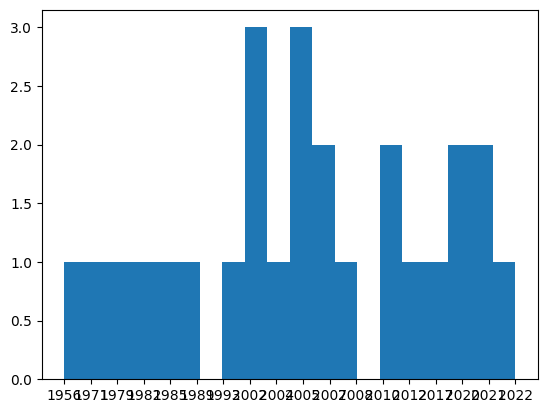

In [36]:
dd.sort()
plt.hist(dd, bins = 20);

In [2]:

1 + 1

2

In [15]:
uu = ss[: ss.find('# Retours #')]

In [3]:
import re

In [17]:
pp = re.compile('202\d+')

In [18]:
L = pp.findall(uu)
L = [ _ for _ in L if len(_) > 4]

In [20]:
len(pp)

51